# Nozzle Notes

### Purpose
This notebook will be a place to try out nozzle design via the method of characteristics. It is assumed that maximum thrust is the quantity to be optimized, because that's the design example I could find. At a later date, I'd like to use similar methods to optimize for heat transfer to a workpiece per unit fuel consumed.

### Credit
This notebook is an implementation of methods from H.L. Rozendaal's 1967 thesis paper, <b>"A generalized method for the design of optimum rocket nozzles."</b> That paper can be found here:

Rozendaal, Harvey Leo, "A generalized method for the design of optimum rocket nozzles " (1967).Retrospective Theses and Dissertations. 3964.https://lib.dr.iastate.edu/rtd/3964

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

## Given Quantities

Stagnation enthalpy, pressure, density, temperature, and outlet pressure, along with a line of  initial data whereon $x,y,q,\theta,p,\rho $ are all specified. (Rozendaal, 9)




In [16]:
# Gas constants
gamma = 1.4 # Ratio of constant temperature and pressure specific heats
k_air = 287.05 # Gas constant for air in Joule/(kg*K)

# Stagnation conditions (combustion chamber)
h_0 = 2314 # stagnation enthalpy in Joules
p_0 = 200000 # about two atmospheres stagnation pressure, pascals
t_in = 2253.15 # inlet temperature at 1980C, adiabatic flame temp for propane
rho_0 = 1.2 # inlet density (using that of air in kg/m3)

# Outlet conditions
p_out = 101325 # let out at atmospheric pressure

# nozzle length
x_f = 5 # 5 centimeters



# Initial data line
# how to arrive at this data is given by Saur and Ahlberg - look this up.
d = {'x':[0,0,0,0,0,0,0,0,0,0,0,0,0],
     'y':[1,0.95,0.9,0.85,0.8,0.75,0.7,0.65,0.6,0.55,0.5,0.4,0.3],
     'q':[823,823,823,823,823,823,823,823,823,823,823,823,823],# velocity in m/s
     'theta':[0.349,0.033155,0.031410,0.029665,0.027920,0.026175,0.024430,0.022685,0.02094,0.019195,0.01765,0.01396,0.01047],
     'p':[132034600,132034600,132034600,132034600,132034600,132034600,132034600,132034600,132034600,132034600,132034600,132034600,132034600],
     'rho':[2.453,2.453,2.453,2.453,2.453,2.453,2.453,2.453,2.453,2.453,2.453,2.453,2.453]}

df0 = pd.DataFrame(data=d)

print(df0)


    x     y    q     theta          p    rho
0   0  1.00  823  0.349000  132034600  2.453
1   0  0.95  823  0.033155  132034600  2.453
2   0  0.90  823  0.031410  132034600  2.453
3   0  0.85  823  0.029665  132034600  2.453
4   0  0.80  823  0.027920  132034600  2.453
5   0  0.75  823  0.026175  132034600  2.453
6   0  0.70  823  0.024430  132034600  2.453
7   0  0.65  823  0.022685  132034600  2.453
8   0  0.60  823  0.020940  132034600  2.453
9   0  0.55  823  0.019195  132034600  2.453
10  0  0.50  823  0.017650  132034600  2.453
11  0  0.40  823  0.013960  132034600  2.453
12  0  0.30  823  0.010470  132034600  2.453


Let's plot out our initial flowfield data.


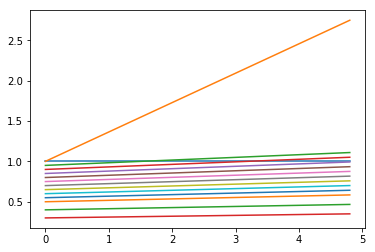

In [41]:
xsample = np.arange(0,x_f,0.2)

fig = plt.figure()
ax = fig.add_subplot(111)

alpha = np.full((25,1),1)
ax.plot(xsample, alpha, label="boundary")

for index, row in df0.iterrows():
    # y = mx + b line equation
    m = math.tan(row['theta'])
    b = row['y']
    y = lambda x: m*x+b
    
    ax.plot(xsample,y(xsample))
    
plt.show()
    



In [ ]:
# Getting ready to compute.

# independent variable: x
x=0
# control variable: alpha - rate of change of nozzle wall slope with respect to x
#alpha=0

# Performance function: R - portion of thrust due to pressure differential on nozzle wall
# We will use the two-dimensional version. This is also labeled 'phi'
R = lambda x,p,p_0,theta: 2*((p*x*tan(theta))-(p_0*x*tan(theta))) #integral from zero to x
# Cutoff function omega# 
omega = lambda x: x-x_f

In [ ]:
#
# Computation procedure
#

# Define alpha_nom - nominal perturbation distribution

# let alpha = alpha_nom
# let alpha_save = alpha

# Algorithm control variables
converged = False
trial_run = True
trial_success = True

while(converged==False):

    # Integrate alpha to get theta nd y distributions for nozzle wall

$\theta^* (x) = \int_0^x a^*(t) dt $

$y^*(x) = \int_0^x tan(\theta^*(t))dt$

In [15]:
    # get nozzle flowfield by method of characteristics
    # compute, store F and G matrices
    # compute phi

    if(trial_run==True):
        print("Hi")
        # Save trial results if they're successful
        if(trial_success):
            alpha_save = alpha
        else:
            print("Trial failed. Scaling d_alpha.")
            # scale d_alpha
    else: # not a trial run.
        print("Updating convergence test")
    
    # if we're not converged, keep going.
    if(converged==False):
        print ("hi")
        if(trial_run==False):
            # integrate backward to compute I's lambdas, and W
            #compute d_alpha based on new I's and lambdas
            # set trial step to true
        
        # set alpha to alpha_save + d_alpha
        alpha = alpha_save + d_alpha

Resources

d

Optimization:
Rozendaal, Harvey Leo, "A generalized method for the design of optimum rocket nozzles " (1967).Retrospective Theses and Dissertations. 3964.https://lib.dr.iastate.edu/rtd/3964

Method of Characteristics:
Salih, A, "Method of Characteristics" (2016) https://www.iist.ac.in/sites/default/files/people/IN08026/MoC_0.pdf

http://mae-nas.eng.usu.edu/MAE_5540_Web/propulsion_systems/section8/section.8.1.pdf

https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/19830016278.pdf

Lecture Notes -
https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-50-introduction-to-propulsion-systems-spring-2012/lecture-notes/MIT16_50S12_lec6.pdf



https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-50-introduction-to-propulsion-systems-spring-2012/lecture-notes/MIT16_50S12_lec8.pdf